# Метод k ближайших соседей

### Сформируем данные

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.rcParams['pcolor.shading'] = 'auto'

In [2]:
def generateRandomCluster(xCenter, yCenter, pointsInCluster, sugma, clusterNumber):
    """
    Функция формирует набор случайных pointsInCluster точек вокруг центра xCenter, yCenter со стандартным отклонением sigma
    Для удобства сразу приписываем номер кластера clusterNumber
    
    Пример
    generateRandomCluster(50, 50, 5, 1, 1)
    [ (49.4383741073746, 50.759631072447775, 1),
     (50.382663637239496, 51.958511415275346, 1),
     (51.35861614413671, 50.14508008851586, 1),
     (49.99654565817289, 48.868625830102836, 1),
     (48.90429842105296, 50.30684883451077, 1) ]
    """
    clusterData = []
    for point in range(pointsInCluster):
        clusterData.append((random.gauss(xCenter, sigma), random.gauss(yCenter, sigma), clusterNumber))
        
    return clusterData

In [3]:
def generateNClusters(clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma):
    """
    Функция генерит clustersNumber кластеров в прелелах (x, y) координат от minCoordinate до minCoordinate + maxLength
        
    Пример
    generateNClusters( 3, 0, 100, 5, 1 )
    
    [
        [ (30.101595428493244, 97.81846577317793, 0),
          (30.982265309141784, 94.85561016707207, 0),
          (29.324361801401345, 96.13225349356063, 0),
          (28.55314432177591, 97.71789084567285, 0),
          (30.925804186398505, 97.73651238892455, 0)],
        [ (35.42172429469604, 62.868371107151994, 1),
          (36.36575870693403, 60.81612414265114, 1),
          (36.3958015730347, 60.845554677754464, 1),
          (35.29157575130411, 63.179905869433654, 1),
          (38.19703749175945, 61.839734328145795, 1)],
        [ (92.22845587073014, 40.18055397530009, 2),
          (90.7642755825596, 40.68519067128221, 2),
          (92.27913966714033, 39.604710170714505, 2),
          (93.57420210013105, 40.20564381974239, 2),
          (92.33724850339567, 40.261922276131735, 2)]
    ]
    """
    clustersData = []
    for cluster in range(clustersNumber):
        clustersData.append(generateRandomCluster(minCoordinate + maxLength * random.random(),
                                                  minCoordinate + maxLength * random.random(),
                                                  pointsInCluster,
                                                  sigma, cluster))
    return clustersData

In [4]:
def drawClusters(clustersData):
    """
    Функция рисует набор кластеров по данным clustersData
    """
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append(point[0])
            yData.append(point[1])
            colors.append(point[2])
        
        plt.scatter(xData, yData, label = colors[0])
        
    plt.legend(loc='upper right')
    plt.show()

In [5]:
clustersNumber = 3
minCoordinate = 0
maxLength = 100
pointsInCluster = 15
sigma = 5

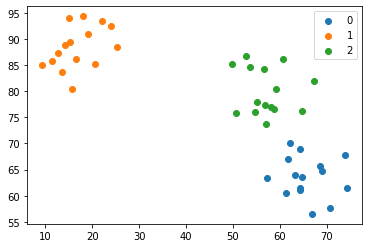

In [6]:
data = generateNClusters(clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma)
drawClusters(data)

### Строим модель

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append([point[0], point[1]])
        Y.append(point[2])

In [10]:
model.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [11]:
def KNeighbors(clustersData, model):
    """
    Визуализация результатов классификации
    """
    step = 1
    xx, yy = np.meshgrid(np.arange(minCoordinate, minCoordinate + maxLength, step),
                         np.arange(minCoordinate, minCoordinate + maxLength, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append(point[0])
            yData.append(point[1])
            colors.append(point[2])
        
        plt.scatter(xData, yData, label = colors[0])
    plt.legend(loc='best')
    
    plt.show()

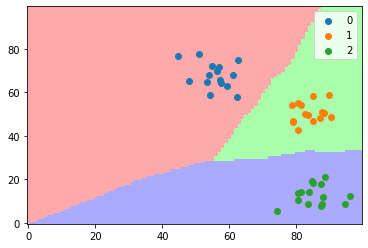

In [12]:
data = generateNClusters(clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma)

X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append([point[0], point[1]])
        Y.append(point[2])
        
model.fit(X, Y)

KNeighbors(data, model)

 ## Подсчет манхэттенского расстояния в игре "Пятнашки"

In [13]:
correct_position = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 0],
]

In [14]:
current_position = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 0, 14, 15],
]

In [15]:
def make_positions_dict(position):
    """
    Формирование словаря координат чисел.
    
    Пример
    make_position_dict(correct_position)
    {
        1: [1, 1],
        2: [1, 2],
        ...
        14: [4, 2],
        15: [4, 3]
    }
    """
    position_dict = {}
    
    row_number = 1
    for row_list in position:
            
        column_number =1
        for column in row_list:
            if column != 0:
                position_dict[column] = [row_number, column_number]
                
            column_number += 1
            
        row_number += 1
        
    return position_dict

In [16]:
correct_dict = make_positions_dict(correct_position)
correct_dict

{1: [1, 1],
 2: [1, 2],
 3: [1, 3],
 4: [1, 4],
 5: [2, 1],
 6: [2, 2],
 7: [2, 3],
 8: [2, 4],
 9: [3, 1],
 10: [3, 2],
 11: [3, 3],
 12: [3, 4],
 13: [4, 1],
 14: [4, 2],
 15: [4, 3]}

In [17]:
current_dict = make_positions_dict(current_position)
current_dict

{1: [1, 1],
 2: [1, 2],
 3: [1, 3],
 4: [1, 4],
 5: [2, 1],
 6: [2, 2],
 7: [2, 3],
 8: [2, 4],
 9: [3, 1],
 10: [3, 2],
 11: [3, 3],
 12: [3, 4],
 13: [4, 1],
 14: [4, 3],
 15: [4, 4]}

In [18]:
dist = 0
for key, coord in correct_dict.items():
    print(key, coord, current_dict[key], np.abs(coord[0] - current_dict[key][0]), abs(coord[1] - current_dict[key][1]))
    dist += abs(coord[0] - current_dict[key][0]) + np.abs(coord[1] - current_dict[key][1])

1 [1, 1] [1, 1] 0 0
2 [1, 2] [1, 2] 0 0
3 [1, 3] [1, 3] 0 0
4 [1, 4] [1, 4] 0 0
5 [2, 1] [2, 1] 0 0
6 [2, 2] [2, 2] 0 0
7 [2, 3] [2, 3] 0 0
8 [2, 4] [2, 4] 0 0
9 [3, 1] [3, 1] 0 0
10 [3, 2] [3, 2] 0 0
11 [3, 3] [3, 3] 0 0
12 [3, 4] [3, 4] 0 0
13 [4, 1] [4, 1] 0 0
14 [4, 2] [4, 3] 0 1
15 [4, 3] [4, 4] 0 1


In [19]:
dist

2

# Поиск наиболее близкого имени участника

## Расстояние Левенштейна

In [20]:
# conda install -c conda-forge python-levenshtein
# или pip install python-levenshtein

import Levenshtein

In [21]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [22]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

### С библиотекой Levenshtein

In [23]:
Levenshtein.distance('Оксана', 'Анна')

4

In [24]:
for recognized_name in speech_recognition:
    for real_name in claim_list:
        result = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    print(result)
    
    break

{'Шехавцова Анна': 11, 'Гречихина Наталья': 14, 'Козлова Алена': 11, 'Груздева Алина': 10, 'Кущенко Анна': 5, 'Чистякова Анастасия': 15}


In [25]:
# x[1] - сортировка по значениям словаря по возрастанию (если надо по убыванию - добавляем минус перед x[1])
# x[0] - сортировка по ключам
sorted(result.items(), key=lambda x: x[1])

[('Кущенко Анна', 5),
 ('Груздева Алина', 10),
 ('Шехавцова Анна', 11),
 ('Козлова Алена', 11),
 ('Гречихина Наталья', 14),
 ('Чистякова Анастасия', 15)]

# Пример использования коэффициента Жаккара

In [26]:
import pandas as pd

Данные по ценам на товары

In [27]:
prices = pd.read_csv('datasets/ids_and_prices.csv')
prices.head()

,id,price
0,b000jz4hqo,0.00
1,b0006zf55o,0.00
2,b00004tkvy,0.00
3,b000g80lqo,599.99
4,b0006se5bq,99.99


In [28]:
details = pd.read_csv('datasets/ids_and_details.csv')
details.head()

,id,name,description,manufacturer
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN
1,b00004tkvy,the beginners bible: noah's ark activity cente...,NaN,NaN
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN


Проверим на наличие дубликатов

Они есть

In [29]:
details['id'].value_counts().sort_values(ascending=False).head()

b00006jo4g    5
b0009i5sgy    4
b00002s5ig    4
b000067fk7    4
b0009hj5ve    4
Name: id, dtype: int64

In [30]:
details.drop_duplicates(subset='id', keep='first', inplace=True)

In [31]:
# Проверим, что дубликатов нет
details['id'].value_counts().sort_values(ascending=False).head()

b000jz4hqo    1
b000i82j80    1
b0006se5bq    1
b00021xhzw    1
b0000dbykm    1
Name: id, dtype: int64

In [32]:
# для пустых описаний NaN подставим пустую строку
# это изменит тип ячейки (с числовой на строковую) и позволит избежать в дальнейшем ошибки

details['description'].fillna('', inplace=True)
details.head()

,id,name,description,manufacturer
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN


In [33]:
data = details.merge(prices, on='id', how='left')
data.head()

,id,name,description,manufacturer,price
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN,0.00
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN,0.00
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN,599.99
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN,99.99
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN,499.99


### Поиск близких описаний

Допустим, мы добавили к нашей таблице новый товар с описанием. Как проверить, что добавленный товар имеет более менее "уникальное описание"? 

Например, мы можем для описания каждого товара из таблицы посчитать количество слов, совпадающих с описанием нового товара. Для удобства для каждого описания из таблицы будем брать долю одинаковых слов от количества слов в описании нового товара.

Таким образом, если описания товаров сильно близки, то наша доля будет приближаться к 100%. Если описание товара из таблицы не имеет общих слов с новым, то доля будет равна 0. Для удобства отсортируем конечную таблицу по убыванию нашей метрики близости.

In [34]:
len(data) == len(details)

True

In [35]:
# пусть "новым товаром" будет один из товаров в нашей таблице

newText = 'encore software 10741 : new! the print shop 22 deluxe offers the best in total personal creativity. 350000+ images & graphics plus 20000+ project templates! packed with new features and tools you have everything you need for satisfy your creative ...'
newText

'encore software 10741 : new! the print shop 22 deluxe offers the best in total personal creativity. 350000+ images & graphics plus 20000+ project templates! packed with new features and tools you have everything you need for satisfy your creative ...'

In [36]:
# для сравнения описаний пословно разобьем наш текст на слова
newTextSplit = set(newText.split(' '))
newTextSplit

{'&',
 '...',
 '10741',
 '20000+',
 '22',
 '350000+',
 ':',
 'and',
 'best',
 'creative',
 'creativity.',
 'deluxe',
 'encore',
 'everything',
 'features',
 'for',
 'graphics',
 'have',
 'images',
 'in',
 'need',
 'new',
 'new!',
 'offers',
 'packed',
 'personal',
 'plus',
 'print',
 'project',
 'satisfy',
 'shop',
 'software',
 'templates!',
 'the',
 'tools',
 'total',
 'with',
 'you',
 'your'}

In [37]:
# мы хотим в итоге считать отношение общих слов двух описаний к количеству слов в описании нового товара text
# в нашем примере 39 слов

len(newTextSplit)

39

Для каждой строки нашей исходной таблицы посчитаем новый столбец similarity. 

Т. е. для каждого описания из столбца description (data['description']) мы применяем делаем определенное вычисление. Для этого используется метод apply:

1. Для каждого описания (назовем его descr) мы получаем список слов в нем - set( descr.split(' ') )
2. Затем получаем список общих слов с описанием нового товара - list( set( descr.split(' ') ) & textSplit )
3. Считаем длину получившегося пересечения len( list( set( descr.split(' ') ) & textSplit ) )
4. Наконец, считаем отношение пересечения к количеству слов в новом описании

In [38]:
def countCrossWords(row, newTextSplit):
    """
    Считаем общее количество слов в описании нового товара newTextSplit и описания текущего товара row['description'].
    
    newTextSplit имеет вид:
    {
        '&',
        '...',
        '10741',
        ...
        'you',
        'your'
    }
    
    row['description'] - просто текст описания очередного товара    
    """
    
    # список слов в описании очередного товара
    currentDescriptionWordsSet = set(row['description'].split(' '))
    
    # список общих слов в описании текущего (row['description']) и нового (newTextSplit) товара
    commonWords = currentDescriptionWordsSet & newTextSplit
    
    return len(commonWords) / len(newTextSplit)

Считаем близовать описания к новому товару

In [39]:
data['similarity'] = data.apply(countCrossWords, axis=1, args=(newTextSplit,)) # similarity - близость
data.head()

,id,name,description,manufacturer,price,similarity
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN,0.00,0.282051
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN,0.00,0.000000
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN,599.99,0.102564
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN,99.99,0.102564
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN,499.99,0.102564


Посмотрим список товаров с самим близким описанием

In [40]:
result = data.sort_values(by='similarity', ascending=False)
result.head()

,id,name,description,manufacturer,price,similarity
652,b000hed3fi,encore software 10741 - the print shop 22 delu...,encore software 10741 : new! the print shop 22...,NaN,49.95,1.000000
714,b000b57k4s,encore software 10038 - encore the print shop ...,encore software 10038 : the print shop 21 delu...,NaN,0.00,0.871795
391,b000aa87go,print shop deluxe 21,overview when you're ready to add a creative t...,NaN,49.99,0.384615
33,b000h22rbg,the printshop v22 deluxe,overview create professional projects with all...,NaN,49.99,0.333333
28,b000h22pg8,the printshop pro publisher v22 deluxe dvd-rom,overview create professional projects with all...,NaN,99.99,0.333333


Средняя цена для этих товаров

In [41]:
result.iloc[1:6]['price'].mean()

43.992000000000004

# kNN для произвольных метрик близости

### Сколько очков наберет игрок в сезоне?

- player – имя игрока
- pos – роль игрока на поле
- g – количество матчей, в которых участвовал игрок
- gs – количество матчей, в которых игрок был на поле с самого начала
- pts – общее количество очков

pos:
- SF small forward
- C center
- PF power forward
- SG shooting guard
- PG point guard
- G guard
- F forward

In [42]:
data = pd.read_csv('datasets/nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


Для построения модели возьмем несколько столбцов

In [43]:
predictionColumns = ['pos', 'age', 'g', 'gs']

In [44]:
dataForPrediction = data[predictionColumns]
dataForPrediction.head()

,pos,age,g,gs
0,SF,23,63,0
1,C,20,81,20
2,PF,27,53,12
3,SG,28,73,73
4,C,25,56,30


In [45]:
dataForPrediction = pd.get_dummies(dataForPrediction)
dataForPrediction.head()

,age,g,gs,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,0,0,0,0,0,1,0
1,20,81,20,1,0,0,0,0,0,0
2,27,53,12,0,0,0,1,0,0,0
3,28,73,73,0,0,0,0,0,0,1
4,25,56,30,1,0,0,0,0,0,0


Заместим, что названия колонок нашего датафрейма изменились

In [46]:
predictionColumns = dataForPrediction.columns.values
predictionColumns

array(['age', 'g', 'gs', 'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG'], dtype=object)

Проведем нормализацию данных

In [47]:
dataNormalized = (dataForPrediction - dataForPrediction.mean())/ dataForPrediction.std()
dataNormalized.head()

,age,g,gs,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,-0.835906,0.384886,-0.862207,-0.479271,-0.045596,-0.045596,-0.498831,-0.462818,1.962285,-0.540742
1,-1.550487,1.095711,-0.187863,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.508550,-0.540742
2,0.116868,-0.010016,-0.457600,-0.479271,-0.045596,-0.045596,2.000520,-0.462818,-0.508550,-0.540742
3,0.355062,0.779789,1.599148,-0.479271,-0.045596,-0.045596,-0.498831,-0.462818,-0.508550,1.845467
4,-0.359519,0.108454,0.149309,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.508550,-0.540742


Проверим, что у всех столбцов среднее 0 и среднеквадратичное отклонение 1

In [48]:
dataNormalized.describe()

,age,g,gs,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
count,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,481.000000,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02
mean,2.806718e-16,1.329498e-16,-2.954440e-17,-7.016794e-17,0.000000,7.386099e-18,-3.693050e-17,7.386099e-18,-6.647489e-17,2.215830e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.788680e+00,-2.063509e+00,-8.622067e-01,-4.792708e-01,-0.045596,-4.559608e-02,-4.988309e-01,-4.628177e-01,-5.085504e-01,-5.407417e-01
25%,-8.359060e-01,-8.393113e-01,-8.622067e-01,-4.792708e-01,-0.045596,-4.559608e-02,-4.988309e-01,-4.628177e-01,-5.085504e-01,-5.407417e-01
50%,-1.213252e-01,3.059057e-01,-5.250348e-01,-4.792708e-01,-0.045596,-4.559608e-02,-4.988309e-01,-4.628177e-01,-5.085504e-01,-5.407417e-01
75%,5.932556e-01,8.982593e-01,9.585214e-01,-4.792708e-01,-0.045596,-4.559608e-02,-4.988309e-01,-4.628177e-01,-5.085504e-01,-5.407417e-01
max,2.975192e+00,1.174691e+00,1.902603e+00,2.082165e+00,21.886116,2.188612e+01,2.000520e+00,2.156186e+00,1.962285e+00,1.845467e+00


Выберем игрока, для которого будем искать наиболее близких

In [49]:
selectPlayer = dataNormalized.loc[0]
selectPlayer

age      -0.835906
g         0.384886
gs       -0.862207
pos_C    -0.479271
pos_F    -0.045596
pos_G    -0.045596
pos_PF   -0.498831
pos_PG   -0.462818
pos_SF    1.962285
pos_SG   -0.540742
Name: 0, dtype: float64

In [50]:
def euclidean_distance(player, selectedPlayer):
    """
    Считаем "расстояние" между выбранным игроком selected_player и текущим player.
    В нашем случае это обычное евклидово расстояние
    """

    dist = 0
    for metricName in predictionColumns:
        dist += (player[metricName] - selectedPlayer[metricName]) ** 2
    
    return dist ** .5

In [51]:
def euclidean_distance2(x, y):
    """
    Считаем "расстояние" между выбранным игроком selected_player и  текущим player.
    Аналогичный расчет для использования в модели KNeighborsRegressor
    """
    return np.sum((x - y ) ** 2) ** .5

Введем новый столбец "близости" игроков к выбранному

In [52]:
dataNormalized['distance'] = dataNormalized.apply(euclidean_distance, axis=1, args=(selectPlayer,))
dataNormalized.head()

,age,g,gs,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG,distance
0,-0.835906,0.384886,-0.862207,-0.479271,-0.045596,-0.045596,-0.498831,-0.462818,1.962285,-0.540742,0.000000
1,-1.550487,1.095711,-0.187863,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.508550,-0.540742,3.759870
2,0.116868,-0.010016,-0.457600,-0.479271,-0.045596,-0.045596,2.000520,-0.462818,-0.508550,-0.540742,3.684999
3,0.355062,0.779789,1.599148,-0.479271,-0.045596,-0.045596,-0.498831,-0.462818,-0.508550,1.845467,4.408134
4,-0.359519,0.108454,0.149309,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.508550,-0.540742,3.740656


Объединяем вычисления с исходными данными

In [54]:
dataWithDistance = data.join(dataNormalized['distance'])
dataWithDistance.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,trb,ast,stl,blk,tov,pf,pts,season,season_end,distance
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,216,28,23,26,30,122,171,2013-2014,2013,0.000000
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,332,43,40,57,71,203,265,2013-2014,2013,3.759870
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,306,38,24,36,39,108,362,2013-2014,2013,3.684999
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,262,248,35,3,146,136,1330,2013-2014,2013,4.408134
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,277,40,23,46,63,187,328,2013-2014,2013,3.740656


In [57]:
dataWithDistance.sort_values(by='distance', ascending=True).head(6)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,trb,ast,stl,blk,tov,pf,pts,season,season_end,distance
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,216,28,23,26,30,122,171,2013-2014,2013,0.000000
181,Jordan Hamilton,SF,23,TOT,60,12,1019,147,376,0.391,...,194,52,44,20,46,67,404,2013-2014,2013,0.421594
213,Robbie Hummel,SF,24,MIN,53,5,655,67,177,0.379,...,132,23,16,2,10,57,181,2013-2014,2013,0.491025
22,Darrell Arthur,SF,25,DEN,68,1,1161,162,410,0.395,...,210,61,39,47,58,185,401,2013-2014,2013,0.516787
42,Michael Beasley,SF,25,MIA,55,2,831,177,355,0.499,...,172,42,23,21,57,93,436,2013-2014,2013,0.575586
106,Jae Crowder,SF,23,DAL,78,8,1254,130,296,0.439,...,194,60,59,21,41,100,356,2013-2014,2013,0.650877


Первую строчку не учитываем (это и был selected_player)

Считаем среднее для первых пяти игроков самых близких игроков

In [58]:
dataWithDistance.sort_values(by='distance', ascending=True).iloc[1:6]['pts'].mean()

355.6

### То же самое с помощью KNeighborsRegressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knn = KNeighborsRegressor(n_neighbors=5)

In [61]:
dataNormalized.iloc[1:, :-1].head()

,age,g,gs,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
1,-1.550487,1.095711,-0.187863,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.50855,-0.540742
2,0.116868,-0.010016,-0.457600,-0.479271,-0.045596,-0.045596,2.000520,-0.462818,-0.50855,-0.540742
3,0.355062,0.779789,1.599148,-0.479271,-0.045596,-0.045596,-0.498831,-0.462818,-0.50855,1.845467
4,-0.359519,0.108454,0.149309,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.50855,-0.540742
5,-0.359519,-0.286448,-0.794772,2.082165,-0.045596,-0.045596,-0.498831,-0.462818,-0.50855,-0.540742


In [63]:
data.loc[1:, 'pts'].head()

1     265
2     362
3    1330
4     328
5      92
Name: pts, dtype: int64

In [64]:
knn.fit(dataNormalized.iloc[1:, :-1], data.loc[1:, 'pts'])

KNeighborsRegressor()

Предсказание количества очков для selected_player (без крайнего правого столбца distance)

In [66]:
knn.predict(dataNormalized.iloc[:1, :-1])

array([355.6])

### И еще раз с помощью KNeighborsRegressor, передавая метрику как функцию

In [68]:
knn = KNeighborsRegressor(n_neighbors = 5, metric=euclidean_distance2)

In [69]:
knn.fit(dataNormalized.iloc[1:, :-1], data.loc[1:, 'pts'] )

KNeighborsRegressor(metric=<function euclidean_distance2 at 0x000001F48078DAF0>)

In [70]:
knn.predict( dataNormalized.iloc[:1, :-1] )

array([355.6])